# Case study on Unsupervised Learning

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [111]:
#reading the dataset
data = pd.read_csv('Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.shape

(178, 13)

In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [113]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

## Preprocessing

### finding outliers

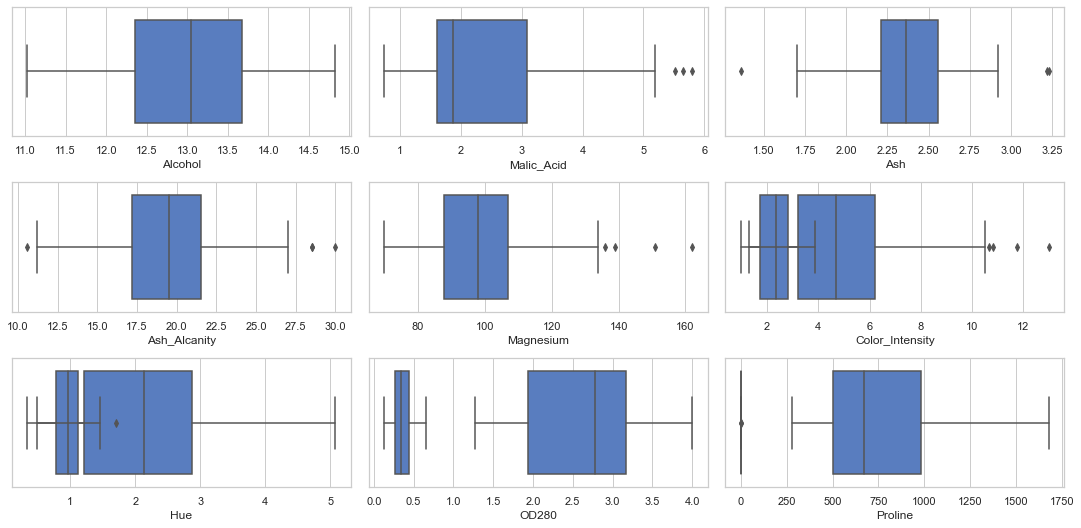

In [114]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(data['Alcohol'], ax = axs[0,0])
plt2 = sns.boxplot(data['Malic_Acid'], ax = axs[0,1])
plt3 = sns.boxplot(data['Ash'], ax = axs[0,2])
plt4 = sns.boxplot(data['Ash_Alcanity'], ax = axs[1,0])
plt5 = sns.boxplot(data['Magnesium'], ax = axs[1,1])
plt6 = sns.boxplot(data['Total_Phenols'], ax = axs[1,2])
plt7 = sns.boxplot(data['Flavanoids'], ax = axs[2,0])
plt8 = sns.boxplot(data['Nonflavanoid_Phenols'], ax = axs[2,1])
plt9 = sns.boxplot(data['Proanthocyanins'], ax = axs[2,2])
plt10 = sns.boxplot(data['Color_Intensity'], ax = axs[1,2])
plt11 = sns.boxplot(data['Hue'], ax = axs[2,0])
plt12 = sns.boxplot(data['OD280'], ax = axs[2,1])
plt13 = sns.boxplot(data['Proline'], ax = axs[2,2])

plt.tight_layout()

# Removing outliers

In [115]:
# define a function called 'outliers' which returns a list of outliers
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
#create list to store indexes of outliers
    ls= df.index[(df[ft]<lower) | (df[ft]>upper)]
    return ls

In [116]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [117]:
#create an empty list to store indexes from multiple columns
index_list=[]
for feature in ['Malic_Acid', 'Ash','Ash_Alcanity','Magnesium','Color_Intensity','Proline']:
    index_list.extend(outliers(data,feature))
index_list

[123,
 137,
 173,
 25,
 59,
 121,
 59,
 73,
 121,
 127,
 69,
 73,
 78,
 95,
 151,
 158,
 159,
 166]

In [118]:
#define a function called 'remove' which returns a cleaned data without outliers
def remove(df,ls):
    ls=sorted(set(ls)) #to sort and remove multiple copies(to get unique)
    df=df.drop(ls)
    return df

In [119]:
data.shape

(178, 13)

In [120]:
data=remove(data,index_list)

In [121]:
data.shape

(163, 13)

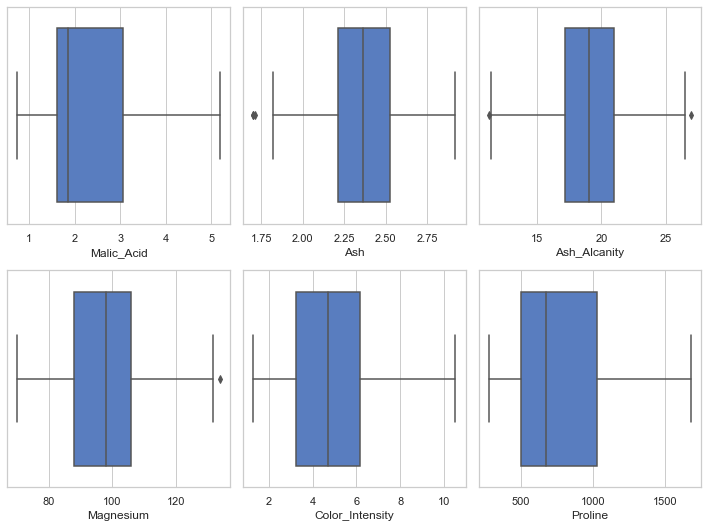

In [122]:
fig, axs = plt.subplots(2,3, figsize = (10,7.5))
plt1 = sns.boxplot(data['Malic_Acid'], ax = axs[0,0])
plt2 = sns.boxplot(data['Ash'], ax = axs[0,1])
plt3 = sns.boxplot(data['Ash_Alcanity'], ax = axs[0,2])
plt4 = sns.boxplot(data['Magnesium'], ax = axs[1,0])
plt5 = sns.boxplot(data['Color_Intensity'], ax = axs[1,1])
plt7 = sns.boxplot(data['Proline'], ax = axs[1,2])


plt.tight_layout()

In [123]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

# Standard scaling

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_new=data.copy()
data_new[data_new.columns]=scaler.fit_transform(data_new)

In [125]:
#data_new = pd.DataFrame(data_new)

In [126]:
data_new.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.486425,-0.574056,0.292319,-1.219144,2.314082,0.797997,1.035465,-0.644246,1.331426,0.310604,0.345572,1.833276,0.959213
1,0.222851,-0.507165,-0.900939,-2.689661,0.121558,0.560087,0.728553,-0.808584,-0.519238,-0.284247,0.390121,1.093472,0.912688
2,0.173780,0.047076,1.279844,-0.216518,0.202762,0.797997,1.219611,-0.479908,2.284243,0.329488,0.301022,0.766251,1.331413
3,1.658173,-0.344715,0.580347,-0.818093,1.177217,2.463369,1.475371,-0.972922,1.129868,1.330349,-0.456317,1.164607,2.246404
4,0.271922,0.266861,2.102780,0.585583,1.583240,0.797997,0.656941,0.259614,0.470226,-0.312574,0.345572,0.424803,-0.064336


In [127]:
data_new.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02
mean,9.562903e-16,1.253258e-16,1.066631e-15,-5.394458e-16,-2.751718e-16,3.759774e-16,-4.236557e-16,-2.193201e-16,2.091034e-16,3.528193e-16,9.535658e-17,-2.642739e-16,1.048922e-16
std,1.003082e+00,1.003082e+00,1.003082e+00,1.003082e+00,1.003082e+00,1.003082e+00,1.003082e+00,1.003082e+00,1.003082e+00,1.003082e+00,1.003082e+00,1.003082e+00,1.003082e+00
min,-2.439242e+00,-1.500977e+00,-2.711400e+00,-2.689661e+00,-2.314580e+00,-2.088648e+00,-1.747197e+00,-1.876782e+00,-2.113374e+00,-1.747771e+00,-1.881896e+00,-1.936880e+00,-1.481796e+00
25%,-8.015028e-01,-6.743930e-01,-5.923378e-01,-7.011203e-01,-8.528973e-01,-8.990967e-01,-8.315789e-01,-7.674997e-01,-5.833700e-01,-8.177252e-01,-7.681621e-01,-8.556276e-01,-7.901251e-01
50%,3.883520e-02,-4.307181e-01,4.291389e-03,-8.283451e-02,-4.085139e-02,1.001267e-01,1.249612e-01,-1.512315e-01,-4.282955e-02,-1.331740e-01,7.827568e-02,2.540785e-01,-2.504356e-01
75%,8.362362e-01,7.207654e-01,6.832143e-01,5.855826e-01,6.087853e-01,7.979970e-01,8.768938e-01,5.882904e-01,5.893279e-01,5.584589e-01,7.019667e-01,7.733641e-01,8.429010e-01
max,2.222487e+00,2.751390e+00,2.308515e+00,2.590834e+00,2.882514e+00,2.510951e+00,1.925507e+00,2.478180e+00,3.695145e+00,2.614473e+00,3.330379e+00,1.947092e+00,2.866737e+00


### WCSS

In [128]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state = 42)
    kmeans.fit(data_new)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

2119.0
1486.3255196134971
1104.501803374321
1018.6575277901486
959.1927392350169
910.0562575827851
862.4046345693873
816.6447219723599
783.7730901434561
755.3438153341144


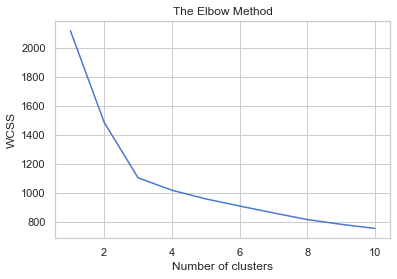

In [129]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Optimal number of clusters as per the Eblow Method is 3

### Applying the model

In [130]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)
type(data)

pandas.core.frame.DataFrame

In [131]:
y_kmeans

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1])

## Checking the efficiency of the model using evaluation metric

In [132]:
from sklearn.metrics import silhouette_score

In [133]:
silhouette_kmeans = silhouette_score(data_new,y_kmeans)
print(silhouette_kmeans)

0.11406249906975728


## 2.Hierarchical Clustering Method

### Using dendrogram to find the number of clusters

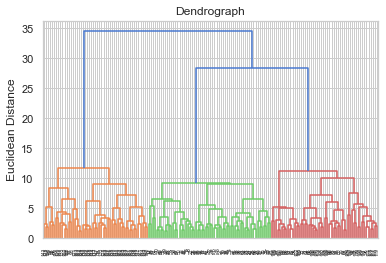

In [134]:
#using the dendrogram to find the optimal number of clusters
#dendrogram is present in scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch
dendrogram= sch.dendrogram(sch.linkage(data_new,method = 'ward'))#creating instance of dendrogram using x with ward method.ward method is used to take the distance between two clusters.
plt.title('Dendrograph')

plt.ylabel('Euclidean Distance')
plt.show()

## Optimum number of clusters is 2

## Fitting Agglomerative Clustering model

In [135]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters= 2,affinity='euclidean', linkage ='ward')# creating an instance hc for agglomeartive clustering with no of clusters is 5,again taking ecludean distance as ward method.
y_hc = hc.fit_predict(data)#fitting it to clustering

In [136]:
y_hc# all the datapoints are clustered into difeeeeeernt groups.

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Evaluation the Model

In [137]:
silhouette_hc = silhouette_score(data,y_hc)
print(silhouette_hc)

0.6647101766557948


### Inference:
   
     * KMeans Model has 3 optimum number of clusters with model efficiency 0.11406249906975728
   
     * Hierarchical Model has 2 optimum number of cluster with model eficiency 0.6647101766557948
